<a href="https://colab.research.google.com/github/AnoshkinDV/Analysis-Data/blob/master/mini_project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
4. Визуализируйте продажи по дням.
5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)?
Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.

In [75]:
import pandas
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/data/2020-12-03')

['Petr_Fedorov',
 'Vasiliy_Ivanov',
 'Alexey_Smirnov',
 'Kirill_Petrov',
 'Vasiliy_Petrov',
 'Anton_Petrov']

In [18]:
path = '/content/drive/MyDrive/Colab Notebooks/data'
path_to_file = path + '/' + os.listdir(path)[0]

In [10]:
path_to_file

'/content/drive/MyDrive/Colab Notebooks/data/2020-12-09'

In [19]:
for path,dirs,files in os.walk(path):
  print(path,dirs,files)

/content/drive/MyDrive/Colab Notebooks/data ['2020-12-07', '2020-12-09', '2020-12-05', '2020-12-06', '2020-12-04', '2020-12-08', '2020-12-03'] []
/content/drive/MyDrive/Colab Notebooks/data/2020-12-07 ['Anton_Ivanov', 'Alexey_Fedorov', 'Alexey_Smirnov', 'Anton_Smirnov', 'Alexey_Ivanov', 'Petr_Fedorov', 'Petr_Smirnov', 'Kirill_Fedorov', 'Vasiliy_Ivanov', 'Rostislav_Fedorov'] []
/content/drive/MyDrive/Colab Notebooks/data/2020-12-07/Anton_Ivanov [] ['data.csv']
/content/drive/MyDrive/Colab Notebooks/data/2020-12-07/Alexey_Fedorov [] ['data.csv']
/content/drive/MyDrive/Colab Notebooks/data/2020-12-07/Alexey_Smirnov [] ['data.csv']
/content/drive/MyDrive/Colab Notebooks/data/2020-12-07/Anton_Smirnov [] ['data.csv']
/content/drive/MyDrive/Colab Notebooks/data/2020-12-07/Alexey_Ivanov [] ['data.csv']
/content/drive/MyDrive/Colab Notebooks/data/2020-12-07/Petr_Fedorov [] ['data.csv']
/content/drive/MyDrive/Colab Notebooks/data/2020-12-07/Petr_Smirnov [] ['data.csv']
/content/drive/MyDrive/Col

In [92]:
import os
import pandas as pd

# Путь до директории data
base_path = '/content/drive/MyDrive/Colab Notebooks/data'

# Список для хранения данных
data_list = []

# Рекурсивный обход директории
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file == 'data.csv':
            # Получаем путь к файлу
            file_path = os.path.join(root, file)
            # Получаем имя пользователя из пути
            user_name = os.path.basename(os.path.dirname(file_path))
            # Получаем дату из пути
            date = os.path.basename(os.path.dirname(os.path.dirname(file_path)))
            # Читаем CSV файл
            df = pd.read_csv(file_path,encoding='windows-1251',sep=',')
            # Добавляем столбцы с именем пользователя и датой
            df['name'] = user_name
            df['date'] = date
            # Добавляем данные в список
            data_list.append(df)

# Объединяем все данные в один DataFrame
final_df = pd.concat(data_list)
final_df = final_df.reset_index()
# Выводим результат
print(final_df)

     index  Unnamed: 0  product_id  quantity            name        date
0        0           0          15         4    Anton_Ivanov  2020-12-07
1        0           0          54         1  Alexey_Fedorov  2020-12-07
2        1           1          77         3  Alexey_Fedorov  2020-12-07
3        2           2          99         4  Alexey_Fedorov  2020-12-07
4        3           3          15         1  Alexey_Fedorov  2020-12-07
..     ...         ...         ...       ...             ...         ...
156      0           0          56         5    Anton_Petrov  2020-12-03
157      1           1          27         3    Anton_Petrov  2020-12-03
158      2           2          82         1    Anton_Petrov  2020-12-03
159      3           3          61         1    Anton_Petrov  2020-12-03
160      4           4          88         5    Anton_Petrov  2020-12-03

[161 rows x 6 columns]


In [93]:
final_df=final_df.drop(columns=['index','Unnamed: 0'])

In [30]:
??os.path.join


In [137]:
final_df.head(10)

,product_id,quantity,name,date,day
0,15,4,Anton_Ivanov,2020-12-07,Monday
1,54,1,Alexey_Fedorov,2020-12-07,Monday
2,77,3,Alexey_Fedorov,2020-12-07,Monday
3,99,4,Alexey_Fedorov,2020-12-07,Monday
4,15,1,Alexey_Fedorov,2020-12-07,Monday
5,20,3,Alexey_Smirnov,2020-12-07,Monday
6,7,1,Alexey_Smirnov,2020-12-07,Monday
7,8,5,Anton_Smirnov,2020-12-07,Monday
8,23,2,Anton_Smirnov,2020-12-07,Monday
9,45,5,Anton_Smirnov,2020-12-07,Monday


In [97]:
final_df.dtypes

,0
product_id,int64
quantity,int64
name,object
date,object


In [98]:
final_df.quantity.sum()

480

In [99]:
final_df.head()

,product_id,quantity,name,date
0,15,4,Anton_Ivanov,2020-12-07
1,54,1,Alexey_Fedorov,2020-12-07
2,77,3,Alexey_Fedorov,2020-12-07
3,99,4,Alexey_Fedorov,2020-12-07
4,15,1,Alexey_Fedorov,2020-12-07


In [152]:
quantity = final_df.groupby('name')\
    .agg({'quantity':'sum'})\
    .sort_values('quantity',ascending=False)

In [166]:
max_quantity = quantity['quantity'].max()

In [167]:
max_quantity

52

In [153]:
quantity

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


In [172]:
quantity.loc[quantity['quantity']==max_quantity].index

Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')

In [102]:
bar=final_df.groupby('product_id',as_index=False)\
                .agg({'quantity':'sum'})\
                .sort_values('quantity', ascending=False)\
                .head(10)


In [134]:
bar

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


In [105]:
final_df['date']=pd.to_datetime(final_df['date'])

<Axes: xlabel='product_id', ylabel='quantity'>

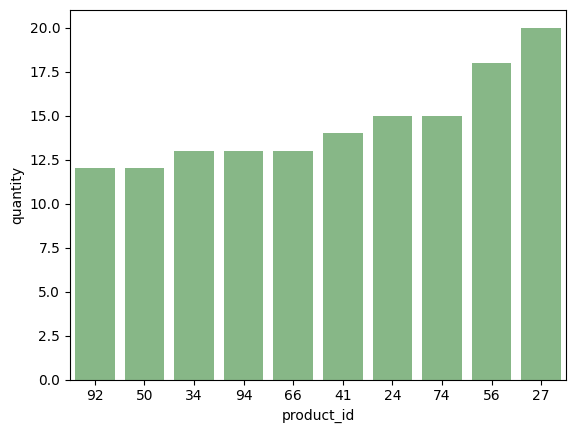

In [175]:
sns.barplot(data=bar,x='product_id',y='quantity',color='green',alpha=0.5,order=bar.sort_values('quantity').product_id)

In [177]:
bar.loc[bar.product_id==56].quantity

,quantity
42,18


In [109]:
bar_day=final_df.groupby('date',as_index=False)\
                .agg({'quantity':'sum'})\
                .sort_values('quantity', ascending=False)\
                .head(10)

In [133]:
bar_day

,date,quantity
1,2020-12-04,113
4,2020-12-07,94
6,2020-12-09,69
5,2020-12-08,68
2,2020-12-05,61
0,2020-12-03,60
3,2020-12-06,15


<Axes: xlabel='date', ylabel='quantity'>

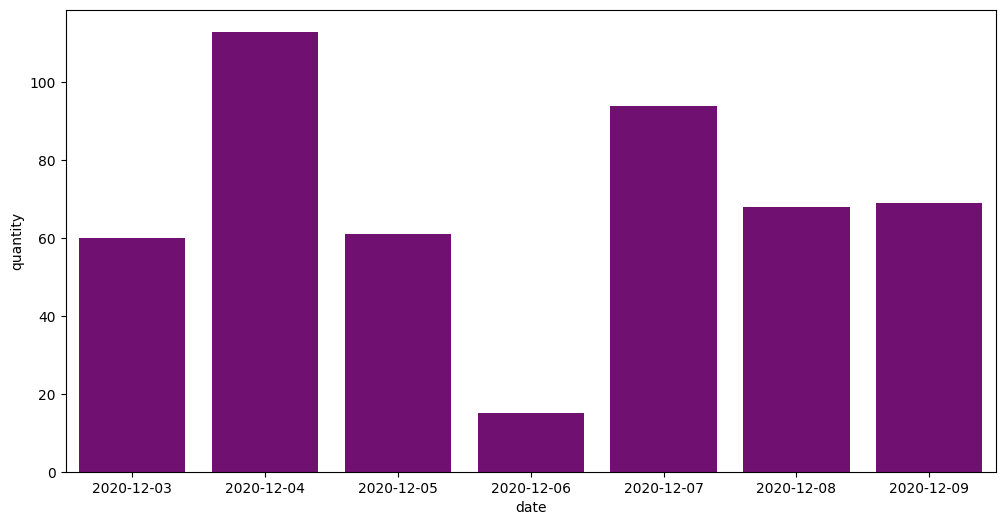

In [178]:
plt.figure(figsize=(12, 6))
sns.barplot(data=bar_day,x='date',y='quantity',color='purple',alpha=1, order=order)
# plt.gcf().autofmt_xdate()


In [112]:
final_df.dtypes

,0
product_id,int64
quantity,int64
name,object
date,datetime64[ns]


In [114]:
final_df['day'] = final_df.date.dt.day_name()

In [115]:
final_df

,product_id,quantity,name,date,day
0,15,4,Anton_Ivanov,2020-12-07,Monday
1,54,1,Alexey_Fedorov,2020-12-07,Monday
2,77,3,Alexey_Fedorov,2020-12-07,Monday
3,99,4,Alexey_Fedorov,2020-12-07,Monday
4,15,1,Alexey_Fedorov,2020-12-07,Monday
...,...,...,...,...,...
156,56,5,Anton_Petrov,2020-12-03,Thursday
157,27,3,Anton_Petrov,2020-12-03,Thursday
158,82,1,Anton_Petrov,2020-12-03,Thursday
159,61,1,Anton_Petrov,2020-12-03,Thursday


<Figure size 1200x600 with 0 Axes>

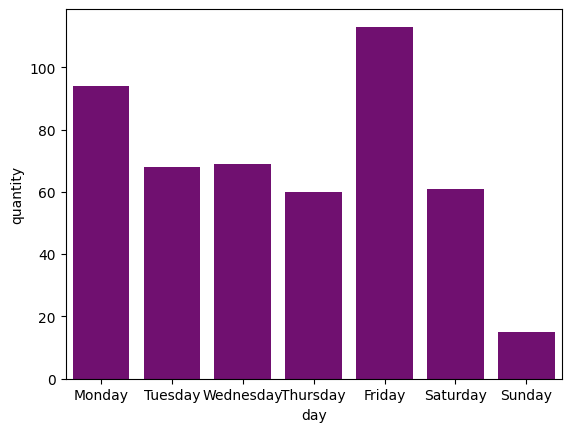

<Figure size 1200x600 with 0 Axes>

In [119]:
bar_week_day =final_df.groupby('day',as_index=False)\
                .agg({'quantity':'sum'})\
                .sort_values('quantity', ascending=False)\
                .head(10)
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
sns.barplot(data=bar_week_day,x='day',y='quantity',color='purple',alpha=1,order=order)
plt.figure(figsize=(12, 6))

In [179]:
final_df

,product_id,quantity,name,date,day
0,15,4,Anton_Ivanov,2020-12-07,Monday
1,54,1,Alexey_Fedorov,2020-12-07,Monday
2,77,3,Alexey_Fedorov,2020-12-07,Monday
3,99,4,Alexey_Fedorov,2020-12-07,Monday
4,15,1,Alexey_Fedorov,2020-12-07,Monday
...,...,...,...,...,...
156,56,5,Anton_Petrov,2020-12-03,Thursday
157,27,3,Anton_Petrov,2020-12-03,Thursday
158,82,1,Anton_Petrov,2020-12-03,Thursday
159,61,1,Anton_Petrov,2020-12-03,Thursday


In [ ]:
# Удаляем дубликаты, оставляя только уникальные комбинации name, product_id и date
unique_purchases = df.drop_duplicates(subset=['name', 'product_id', 'date'])

# Группируем по name и product_id и считаем количество уникальных дат
repeated_purchases = unique_purchases.groupby(['name', 'product_id']).size().reset_index(name='purchase_count')

# Фильтруем пользователей, у которых количество покупок одного товара больше 1
repeated_users = repeated_purchases[repeated_purchases['purchase_count'] > 1]

# Получаем уникальных пользователей с повторными покупками
unique_repeated_users = repeated_users['name'].unique()

# Количество пользователей с повторными покупками
num_repeated_users = len(unique_repeated_users)

print(f"Количество пользователей, которые приобрели товар повторно: {num_repeated_users}")
print(f"Список пользователей: {unique_repeated_users}")

In [189]:
# Удаляем дубликаты, оставляя только уникальные комбинации name, product_id и date
unique_purchases = df.drop_duplicates(subset=['name', 'product_id', 'date'])

In [190]:
unique_purchases

,product_id,quantity,name,date,day
0,15,4,Anton_Ivanov,2020-12-07,Monday
1,54,1,Alexey_Fedorov,2020-12-07,Monday
2,77,3,Alexey_Fedorov,2020-12-07,Monday
3,99,4,Alexey_Fedorov,2020-12-07,Monday
4,15,1,Alexey_Fedorov,2020-12-07,Monday
...,...,...,...,...,...
156,56,5,Anton_Petrov,2020-12-03,Thursday
157,27,3,Anton_Petrov,2020-12-03,Thursday
158,82,1,Anton_Petrov,2020-12-03,Thursday
159,61,1,Anton_Petrov,2020-12-03,Thursday


In [188]:
df = final_df

In [195]:
# Группируем по name и product_id и считаем количество уникальных дат
repeated_purchases = unique_purchases.groupby(['name', 'product_id']).size().reset_index(name='purchase_count')

In [196]:
# Фильтруем пользователей, у которых количество покупок одного товара больше 1
repeated_users = repeated_purchases[repeated_purchases['purchase_count'] > 1]

In [197]:
repeated_users

,name,product_id,purchase_count
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


In [198]:
unique_repeated_users = repeated_users['name'].unique()

In [199]:
unique_repeated_users

array(['Anton_Ivanov', 'Petr_Fedorov'], dtype=object)

Доп задание
Имеется таблица с записями о компаниях, включая их ИНН, и отдельный текстовый файл с набором ИНН (колонка head_inn), которые хранятся в папке 4_inn.
inn.xls — таблица в экселевском формате necessary_inn.txt — перечень необходимых ИНН в текстовом формате
Задачи:
извлечь из таблицы записи с ИНН, указанными в текстовом файле  записать
результат в файл selected_inn.csv
В качестве проверки укажите сумму колонки income,RUB в отобранных данных.
NB! У набора данных necessary_inn.txt нет заголовка, поэтому вам пригодится
аргумент header=None.



In [200]:
path = '/content/drive/MyDrive/Colab Notebooks/4_necessary_inn.txt'

In [201]:
with open(path,'r') as f:
  inn = f.readlines()

In [251]:
necessery= [int(i.replace('\n','')) for i in inn]
necessery

[394609645484,
 281578625230,
 923769811917,
 998694734508,
 271011690615,
 924952812367,
 646685244561,
 581531230312,
 841967395801,
 962179889311,
 873191383820,
 590538076039,
 194319975048,
 614658394086,
 571270160555,
 609400911893,
 595260069852,
 706966142477,
 173050718969,
 968048428696,
 806967744814,
 575198252501,
 283081417246,
 663119569897,
 600958529354,
 280452832937,
 415557497037,
 195142638722,
 472181033836,
 722903871682,
 442387408954,
 196518820495,
 653798670054,
 126259856639,
 175482780898,
 192518356612,
 817648134701,
 321724220657,
 864970037680,
 822991191528,
 205472219644,
 532801459453,
 657038381012,
 197916669463,
 849814898285,
 617082656257,
 500480544925,
 765833725639,
 263518962896,
 415856290529,
 812729265571,
 688172366656,
 837771137752,
 456294893364,
 668157292633,
 491435460276,
 323896131459,
 664667769879,
 293128896936,
 833493884251,
 120708914823,
 860475372268,
 172328288163,
 452188261986,
 818829342640,
 948029225406,
 310163740

In [239]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/selected_inn.csv')

In [261]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/4_inn.xls')

In [262]:
data.head()

,Unnamed: 0,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
0,0,0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896
1,1,1,"РАО «Тимофеева, Алексеева и Кузнецова»",9342309660697,"г. Арзамас, наб. Фестивальная, д. 7 стр. 8/2, ...",Рожков Харлампий Алексеевич,Воспитатель,704229465069,8 (632) 620-8879,safonovantonin@rao.org,ooo.net,1990-05-16,2019-01-18,18393547520,19072454279,Tyoply Stan,"ст. Кяхта, бул. Нефтяников, д. 24, 768742",Формирование заказных методик,33876448811,47437574301
2,2,2,РАО «Юдин-Ефимова»,1277485323451,"п. Меренга, алл. Достоевского, д. 3/4 к. 497, ...",Филимон Фадеевич Дьячков,Автослесарь,267655036377,+74925330378,kdorofeev@npo.ru,ao.com,1982-11-04,1986-06-19,56104355836,18629292792,Danilov,"клх Усолье Сибирское, алл. Шишкина, д. 3/9 к. ...",Максимизация корпоративных метрик,94073834991,7701710065
3,3,3,Доронин Инкорпорэйтед,7139161431511,"д. Иваново, ул. Красных Партизан, д. 83 к. 4, ...",Крылов Глеб Якубович,Тюремный надзиратель,362024991175,+7 118 643 21 48,nkulakova@mail.ru,ooo.ru,2005-01-02,2004-04-06,10398489351,32502585383,Beryozovsky,"г. Заводоуковск, ул. Гражданская, д. 7 к. 8/5,...",Разработка ориентированных на пользователя инт...,86971505490,61148002572
4,4,4,Объединенная энергетическая компания,6114798049639,"к. Энгельс, наб. Шишкина, д. 120, 823828",Субботин Вячеслав Федотович,Инженер-электрик,257948948010,8 642 249 2134,evgraf_18@yahoo.com,gerasimova.biz,1983-07-02,1992-06-20,20074507047,40083207999,Bavly,"к. Соль-Илецк, пер. Пригородный, д. 804 к. 1/3...",Монетизация интуитивных веб-сервисов,36351136214,34861533393


In [263]:
data = data.drop(['Unnamed: 0','#'], axis = 1)

In [264]:
data.shape


(2110, 18)

In [269]:
# data = data.loc[data.head_inn.isin(necessery)]
data = data.query('head_inn in @necessery') # Здесь нужно указывать собачку!!

In [270]:
data

,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
47,Пермэнергосбыт,6417532956774,"ст. Слюдянка, пер. Брянский, д. 378 стр. 634, ...",Емельян Феликсович Зайцев,Релайтер,175482780898,8 833 729 83 14,boleslav28@gmail.com,krilova.net,1986-03-20,1998-02-11,47158105405,10234283083,Novosilikatnyy,"г. Кропоткин (Краснод.), пр. Лесный, д. 8/3 к....",Разработка подробных результатов,44637351562,67534335517
76,ЗАО «Кабанова Ковалев»,9343329412518,"с. Нарткала, ул. Верхняя, д. 68 стр. 1, 393309",Геннадий Денисович Григорьев,Бондарь,120708914823,+7 455 632 1053,kapustinjulian@oao.com,ao.ru,2011-09-28,1983-11-10,20653722407,92544205998,Severodvinsk,"д. Москва, МГУ, бул. Транспортный, д. 75 стр. ...",Монетизация передовых действий,78570288945,19932336080
77,Неофарм,3813743111150,"г. Долинск, ш. Московское, д. 25 к. 5, 227970",Юрий Архипович Богданов,Полицейский,663119569897,+7 077 854 47 31,bazhen41@matveeva.net,ao.com,2019-01-30,1986-09-01,96067740308,47030638090,Kovylkino,"с. Сладково, наб. Вавилова, д. 62 к. 627, 198606",Эксплуатация круглосуточных пользователей,30634104861,3103853229
85,Арконик СМЗ,7465966885549,"п. Тобольск, ул. Лунная, д. 375 стр. 724, 119588",Аникей Артёмович Павлов,Оперативный работник,722903871682,8 120 448 48 45,emeljan_75@gmail.com,ao.com,2004-08-10,2012-04-01,79166677871,45647356291,Otradnyy,"клх Миасс, пер. Тургенева, д. 4/2 к. 8, 505443",Использование серверных диапазонов,85286893329,8607813826
90,Фармперспектива,6205521489390,"к. Горно-Алтайск, ул. Степана Разина, д. 646 с...",Шашков Алексей Богданович,Фортификатор,837771137752,88711723244,ustinovaoksana@gmail.com,npo.biz,1982-05-29,1981-10-10,13185275127,67033649508,Ishim,"клх Кунгур, ш. Запрудное, д. 13, 038583",Максимизация мультимедийных интерфейсов,88304638400,29181260019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,"ЗАО «Кабанова, Титов и Бирюкова»",4405157155853,"клх Щелково, наб. Некрасова, д. 518, 873237",Варлаам Елисеевич Емельянов,Инженер-конструктор,575198252501,+7 (038) 371-4551,valentin1979@oao.org,abb.net,2006-11-18,2016-02-29,78655694400,49188723218,Valday,"п. Курск, пер. Восьмого Марта, д. 7, 831314",Синхронизация круглосуточных пользователей,97034714796,9608612080
2074,"ООО «Фомин, Симонова и Никифорова»",9213736030860,"к. Курск, ш. Баумана, д. 4 к. 3/4, 468572",Антип Антонович Смирнов,Радиолог,270813334693,+70989264802,nikandrzhukov@gmail.com,rao.com,1999-07-31,2009-02-27,51955852862,98399872283,Privolzhskiy,"п. Кашхатау, ш. Базарное, д. 66 стр. 5, 004721",Перезагрузка B2C действий,77532182557,7246816762
2089,НПО «Зимин Иванов»,6791957421599,"п. Апрелевка, пер. Поселковый, д. 12 стр. 9, 9...",Муравьев Константин Игнатович,Географ,124852843647,8 160 092 8516,vadim05@ooo.biz,npo.edu,2001-11-16,2010-10-03,83247763843,43244910008,Gudermes,"п. Камышлов, ул. Фабричная, д. 2, 994773",Развитие популярных интернет-компаний,53149780410,48323910899
2106,Юдина Лтд,5012825137426,"д. Темрюк, ш. Автомобилистов, д. 9 стр. 59, 80...",Игнатов Кирилл Арсенович,Прозектор,703895742672,+7 854 489 5577,gavrila_2019@gmail.com,npo.net,1973-08-13,2001-11-09,40544984216,35386922447,Tver,"к. Мыс Шмидта, алл. Комарова, д. 257 стр. 3, 8...",Увеличение кроссплатформенных действий,20441750025,67450329265


In [267]:
data.shape

(115, 18)

In [271]:
data['income,RUB'].sum()

6104522627393

In [272]:
data.to_csv('selected_inn.scv',index=False)